In [148]:
import pandas as pd

data = pd.read_csv ( 'airquality.csv')
pd.options.mode.chained_assignment = None

data=pd.DataFrame(data,columns =['Ozone','Solar.R','Wind','Temp','Month','Day'])

dnan=data[pd.isnull(data['Ozone'])]
df=data[pd.notnull(data['Ozone'])]
#fact1=pd.cut(df['Ozone'], 5)
df['Ozone']=pd.cut(df['Ozone'], 5,labels=['bin1', 'bin2', 'bin3', 'bin4', 'bin5'])
dnan['Ozone']="binNA"
df=pd.concat([df,dnan]).sort_index(axis=0)
####
dnan1=df[pd.isnull(df['Solar.R'])]
df1=df[pd.notnull(data['Solar.R'])]
df1['Solar.R']=pd.qcut(df1['Solar.R'], [0, .25, .5, .75, 1],labels=['bin1', 'bin2', 'bin3', 'bin4'])
dnan1['Solar.R']="binNA"
df1=pd.concat([df1,dnan1]).sort_index(axis=0)
#pd.value_counts(fact1)
#fact1
#df1['passed']=df['Month'].map(str)+','+df['Day'].map(str)
#df1['start']=pd.to_datetime('5,1', format='%m,%d')
#df1['end']=pd.to_datetime(df['Month'].map(str)+','+df['Day'].map(str), format='%m,%d')
#start=pd.to_datetime('5,1', format='%m,%d')
#end1=pd.to_datetime('6,2', format='%m,%d')
#(end1-start).days
df1['AbsDay']=(pd.to_datetime(df['Month'].map(str)+','+df['Day'].map(str), format='%m,%d')-pd.to_datetime('5,1', format='%m,%d'))
df1


,Ozone,Solar.R,Wind,Temp,Month,Day,AbsDay
0,bin2,bin2,7.4,67,5,1,0 days
1,bin2,bin2,8.0,72,5,2,1 days
2,bin1,bin2,12.6,74,5,3,2 days
3,bin1,bin4,11.5,62,5,4,3 days
4,binNA,binNA,14.3,56,5,5,4 days
5,bin1,binNA,14.9,66,5,6,5 days
6,bin1,bin4,8.6,65,5,7,6 days
7,bin1,bin1,13.8,59,5,8,7 days
8,bin1,bin1,20.1,61,5,9,8 days
9,binNA,bin2,8.6,69,5,10,9 days


Exercise 4: Data transformation.
With the data frame“airquality.csv” solve the following exercises:
1.  Discretise the Ozone column into five bins (‘bin1’, ‘bin2’, ...)  of
equal width and a sixth bin (‘binNA’) for NA.
2.  Discretise the Solar column into four bins of equal size and a fifth
bin for NA.
3.  Create a new column AbsDay from the columns Month and Day
such that counts the number of days passed from Month=5 and
Day=1.
•
Exercise 5: Data transformation.
With the data frame “titanic” solve the following exercises:
2
1.  Numerise  the  class  column,  where  Crew=4,  1st=3,  2nd=2  and
3rd=1.
2.  Transform the titanic data frame into a new data frame (titanic2)
with as many examples as passengers using the Freq column.  In
other words, there should be no rows for those for which Freq=0
and there should be 35 replicated rows for those with Freq=35.
3.  Compare the plots of the original titanic data frame with the new
one.
•
Exercise 6: Data selection.
1.  Calculate a correlation matrix for the air dataset.  Do you see a
pair of attributes that are redundant?
2.  Calculate a correlation matrix for the cars dataset.  Do you see a
pair of attributes that are redundant?
3.  Using the data frame ‘air’, perform a simple random sampling of
50 examples.
4.  Using the data frame ‘air’, perform a stratified random sampling
of 5 examples of each month

In [266]:
import pandas as pd
data = pd.read_csv ( 'titanic.csv')
#data.iloc[:,['Class']]=data.iloc[:,['Class']].
#data.Class.unique()
data.loc[:,['Class']]=data.loc[:,['Class']].replace('1st','3',regex=False)
data.loc[:,['Class']]=data.loc[:,['Class']].replace('2nd','2',regex=False)
data.loc[:,['Class']]=data.loc[:,['Class']].replace('3rd','1',regex=False)
data.loc[:,['Class']]=data.loc[:,['Class']].replace('Crew','4',regex=False)

data

titanic1 = pd.DataFrame([data.ix[idx] 
                       for idx in data.index 
                       for _ in range(data.ix[idx]['Freq'])]).reset_index(drop=True)

titanic1


C:\Users\Denas\Miniconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,Unnamed: 0,Class,Sex,Age,Survived,Freq
0,3,1,Male,Child,No,35
1,3,1,Male,Child,No,35
2,3,1,Male,Child,No,35
3,3,1,Male,Child,No,35
4,3,1,Male,Child,No,35
5,3,1,Male,Child,No,35
6,3,1,Male,Child,No,35
7,3,1,Male,Child,No,35
8,3,1,Male,Child,No,35
9,3,1,Male,Child,No,35


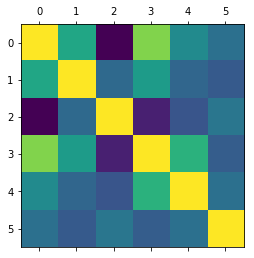

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.348342,-0.601547,0.698360,0.164519,-0.013226
Solar.R,0.348342,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.601547,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.698360,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.164519,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,-0.013226,-0.150275,0.027181,-0.130593,-0.007962,1.000000


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv ( 'airquality.csv')
plt.matshow(data.corr())
plt.show()
data.corr()
#.corr(method='pearson')

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv ( 'airquality.csv')
data.sample(50)
#df.take(np.random.permutation(len(df))[:50])

,Ozone,Solar.R,Wind,Temp,Month,Day
145,bin2,139.0,10.3,81,9,23
47,bin2,284.0,20.7,72,6,17
81,bin1,7.0,6.9,74,7,21
136,bin1,24.0,10.9,71,9,14
32,binNA,287.0,9.7,74,6,2
65,bin2,175.0,4.6,83,7,5
120,bin4,225.0,2.3,94,8,29
149,binNA,145.0,13.2,77,9,27
39,bin3,291.0,13.8,90,6,9
137,bin1,112.0,11.5,71,9,15


In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv ( 'airquality.csv')
#data.loc[data.Month==5]
#data.Month.unique()
b=pd.DataFrame([])
for idx in data.Month.unique():
    c=pd.DataFrame(data.loc[data.Month==idx]).sample(5)
    b.append(c,ignore_index=True)
#                        for _ in range(data.ix[idx]['Freq'])]).reset_index(drop=True)
b

""


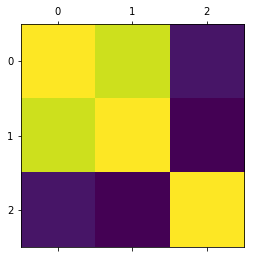

,Unnamed: 0,speed,dist
Unnamed: 0,1.000000,0.985459,0.817658
speed,0.985459,1.000000,0.806895
dist,0.817658,0.806895,1.000000


In [190]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv ( 'cars.csv')
plt.matshow(data.corr())
plt.show()
data.corr()